In [8]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


llm=ChatGroq(model="llama-3.1-8b-instant")
result=llm.invoke("Hello")

print(result.content)

Hello, how can I assist you today?


In [32]:
class State(TypedDict): 
    topic: str 
    Characters_and_Rels: str 
    setting_and_plot: str 
    final_story:str

def genChars_rels(state: State):
    op = llm.invoke(
        "you are expert at generating characters and establishing relationships "
        f"between them and this topic is about {state['topic']}. "
        "Just give the characters and their relationships."
    )
    return {"Characters_and_Rels": op.content}  


def settingPlot(state: State):
    op = llm.invoke(
        "you are expert at generating the setting and plot "
        f"and this topic is about {state['topic']}. "
        "Just give the setting and plot."
    )
    return {"setting_and_plot": op.content}


def finalStory(state: State):
    op = llm.invoke(
        f"This is the story {state['Characters_and_Rels']} and {state['setting_and_plot']}. "
        "Give the final version of the story using the characters and setting and plot."
    )
    return {"final_story": op.content} 


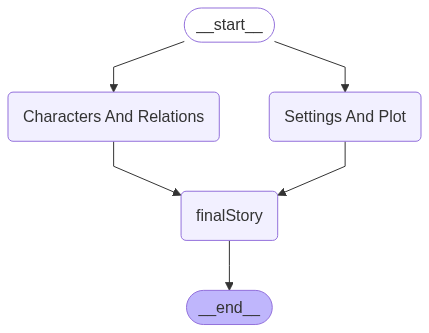

In [33]:
# Graph Building

builder = StateGraph(State)
builder.add_node("Characters And Relations", genChars_rels)
builder.add_node("Settings And Plot", settingPlot)
builder.add_node("finalStory", finalStory)

# Edges
builder.add_edge(START, "Characters And Relations")
builder.add_edge(START, "Settings And Plot")

builder.add_edge("Characters And Relations", "finalStory")
builder.add_edge("Settings And Plot", "finalStory")

builder.add_edge("finalStory", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [34]:
res=graph.invoke({"topic":"born genius vs made genius"})

In [38]:
print(res["final_story"])

In the year 2050, the futuristic city of Nova Haven buzzed with intellectual pursuits and technological innovation. The city was home to the prestigious NeuroSpark Academy, a hub for cultivating genius-level intellect and exceptional abilities. The academy's students were among the brightest minds in the world, and Elianore "Eli" Quasar, a 17-year-old prodigy, had just been admitted to the institution with an exceptional IQ of 200.

Eli's natural genius was evident in his uncanny ability to grasp complex concepts, solve intricate problems, and create revolutionary inventions. However, his past was shrouded in mystery, and his parents' identity was unknown. The academy's administrators had taken him in, providing him with a nurturing environment and exceptional resources to help him reach his full potential.

As Eli navigated the challenges of NeuroSpark Academy, he met his fellow students, including Kaito Yamato, a determined and driven graduate student who had always felt pressure to 